In [8]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

In [10]:
@dataclass
class LRInterval:
    a: float
    b: float
    alpha: float
    beta: float

    def __add__(self, other):
        a = self.a + other.a
        b = self.b + other.b
        alpha = self.alpha + other.alpha
        beta = self.beta + other.beta

        return LRInterval(a, b, alpha, beta)

    def __sub__(self, other):
        a = self.a - other.a
        b = self.b - other.b
        alpha = self.alpha + other.beta
        beta = self.beta + other.alpha

        return LRInterval(*sorted([a, b]), alpha, beta)

    def __mul__(self, other):
        a = self.a * other.a
        b = self.b * other.b
        alpha = self.alpha * other.a + other.alpha * self.a
        beta = self.beta * other.b + other.beta * self.b

        return LRInterval(*sorted([a, b]), alpha, beta)

    def __truediv__(self, other):
        a = self.a / other.b
        b = self.b / other.a
        alpha = (self.a * other.beta + self.alpha * other.b) / (other.b ** 2)
        beta = (self.beta * other.a + self.b * other.alpha) / (other.a ** 2)

        return LRInterval(*sorted([a, b]), alpha, beta)

def trapmf(a: float, b: float, c: float, d: float) -> LRInterval:
    return LRInterval(a, b, a - c, d - b)

def trimf(a: float, b: float, c: float) -> LRInterval:
    return LRInterval(a, a, a - b, c - a)

def rectmf(a: float, b: float) -> LRInterval:
    return LRInterval(a, b, 0, 0)

def const(a: float) -> LRInterval:
    return LRInterval(a, a, 0, 0)

In [11]:
def plot_lr_intervals(*intervals, labels=None, title="LR Interval Visualization"):
    plt.figure(figsize=(10, 5))

    for i, interval in enumerate(intervals):
        a, b = interval.a, interval.b
        alpha, beta = interval.alpha, interval.beta
        x = [a - alpha, a, b, b + beta]
        y = [0, 1, 1, 0]

        label = labels[i] if labels else f"Interval {i+1}"
        plt.plot(x, y, label=label)
        plt.fill_between(x, y, alpha=0.2)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("Membership")
    plt.grid(True)
    plt.legend()
    plt.show()


### Приклад 1
Дохід магазинів `A`, `B`, `C` та `D` можна позначити як нечітку величину відповідну вірогідності отриманню певної суми

Магазини `A`, `B` і `C` завжди прибуткові, а `D` - завжди збитковий

Знайти **дохід (`E`)** та **чистий дохід (`F`)**

In [7]:
A = trapmf(50, 70, 40, 100)
B = rectmf(100, 110)
C = trimf(0, 0, 20)
D = trimf(80, 50, 100)

E = A + B + C
F = E - D

print(E, F)

LRInterval(a=150, b=180, alpha=10, beta=50) LRInterval(a=70, b=100, alpha=30, beta=80)


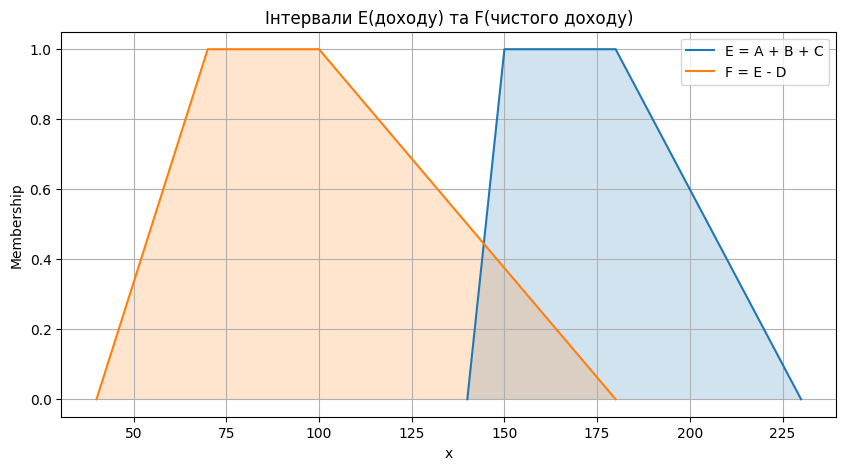

In [13]:
plot_lr_intervals(E, F, labels=["E = A + B + C", "F = E - D"], title="Інтервали E(доходу) та F(чистого доходу)")

Очевидно, рівні впевненості щодо значень отримання чистого доходу зсунуті ліворуч на осі Х відносно доходу
Із найбільшою впевненістю можна гоорити про рівень доходу від 70 до 100 тисяч умовних одиниць

### Приклад 2
Автоділер продавав **від чотирьох до семи машин на тиждень**

Проте, було проведено рекламну кампанію **за 30 тис. у.о.** і **продажі зросли до ~16 на тиждень**

Такий ефект спостерігався протягом **трьох тижнів**

Наскільки ефективною була реклама якщо питомий **прибуток від продажу одного авто оцінюється у 1.5 тис. у.о.**?

In [15]:
P_1 = trapmf(16, 17, 12, 21)
P_2 = const(48)
q = const(1.5)
C = const(30)

S1 = P_1 * q
S2 = P_2 * q

E = (S2 - S1) / C

print(S1, S2, S2-S1)
print(E)

LRInterval(a=24.0, b=25.5, alpha=6.0, beta=6.0) LRInterval(a=72.0, b=72.0, alpha=0.0, beta=0.0) LRInterval(a=46.5, b=48.0, alpha=6.0, beta=6.0)
LRInterval(a=1.55, b=1.6, alpha=0.2, beta=0.2)


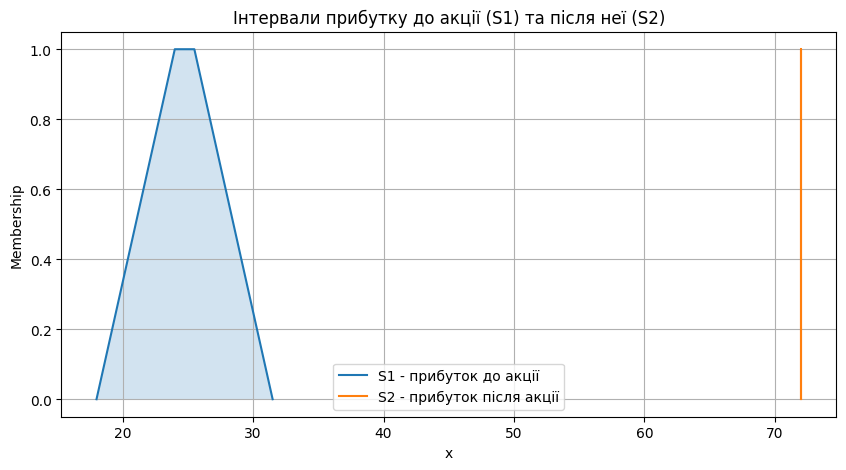

In [16]:
plot_lr_intervals(S1, S2, labels=["S1 - прибуток до акції", "S2 - прибуток після акції"], title="Інтервали прибутку до акції (S1) та після неї (S2)")

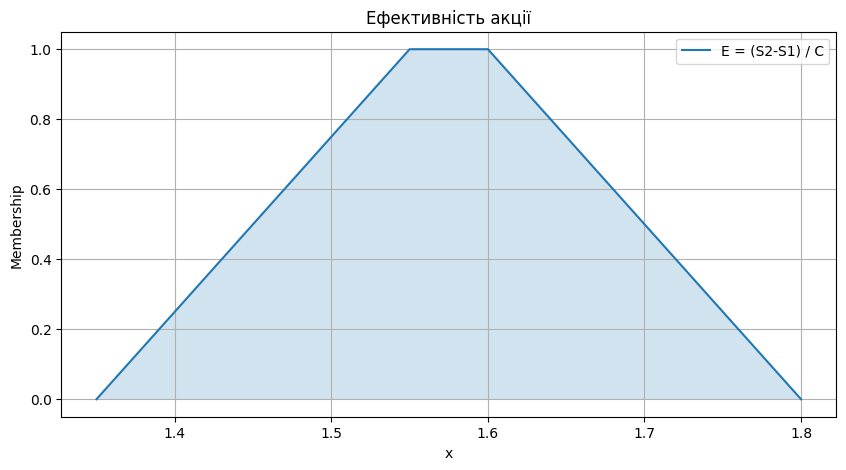

In [17]:
plot_lr_intervals(E, labels=["E = (S2-S1) / C"], title="Ефективність акції")

Отже, найбільш впевнено можна говорити про ефективність на рівні 1.55-1.6

### Власний приклад 1

Міністерство торгівлі вирішило перевизначити розмір мит відповідно до нової політики

За нею відсоток мит прив'язується до сальдо товарообігу:
* Для країн, що мають сальдо 10% та нижче запроваджуються мита у 10%
* Для усіх інших країн мита відповідають розміру сальдо

Попередня політика передбачала універсальну ставку у 9%

Країна `A` мала сальдо у -5% і не змінила своєї торгівельної стратегії.
Обсяг імпорту з неї складає від 30 до 40 мільйонів.

Країна `B` мала сальдо у 20% і вирішила дзеркально підвищити ціну. 
Обсяг імпорту з неї складає від 100 до 120 мільйонів.

Країна `C` мала сальдо у 55% і вирішила перестати імпортувати 90% товарів.
Обсяг імпорту з неї складає від 300 до 310 мільйонів.

In [18]:
A_i1 = rectmf(30, 40)
A_i2 = A_i1
A_e1 = A_i1 * const(1.05)
A_e2 = A_e1

B_i1 = rectmf(100, 120)
B_i2 = B_i1 * const(1.2)
B_e1 = B_i1 * const(0.8)
B_e2 = B_e1

C_i1 = rectmf(300, 310)
C_i2 = C_i1
C_e1 = C_i1 * const(1 / 1.55)
C_e2 = C_e1 * const(0.1)

T1 = (A_i1 + B_i1 + C_i1) * const(0.09)
T2 = A_i2 * const(0.1) + B_i2 * const(0.2) + C_i2 * const(0.55)

E1 = A_e1 + B_e1 + C_e1
E2 = A_e2 + B_e2 + C_e2

P1 = T1 + E1
P2 = T2 + E2

Eff = P2 / P1

print(T1, T2)
print(E1, E2)
print(P1, P2)
print(Eff)

LRInterval(a=38.699999999999996, b=42.3, alpha=0.0, beta=0.0) LRInterval(a=192.0, b=203.3, alpha=0.0, beta=0.0)
LRInterval(a=305.04838709677415, b=338.0, alpha=0.0, beta=0.0) LRInterval(a=130.8548387096774, b=158.0, alpha=0.0, beta=0.0)
LRInterval(a=343.74838709677414, b=380.3, alpha=0.0, beta=0.0) LRInterval(a=322.85483870967744, b=361.3, alpha=0.0, beta=0.0)
LRInterval(a=0.8489477746770376, b=1.0510594771119162, alpha=0.0, beta=0.0)


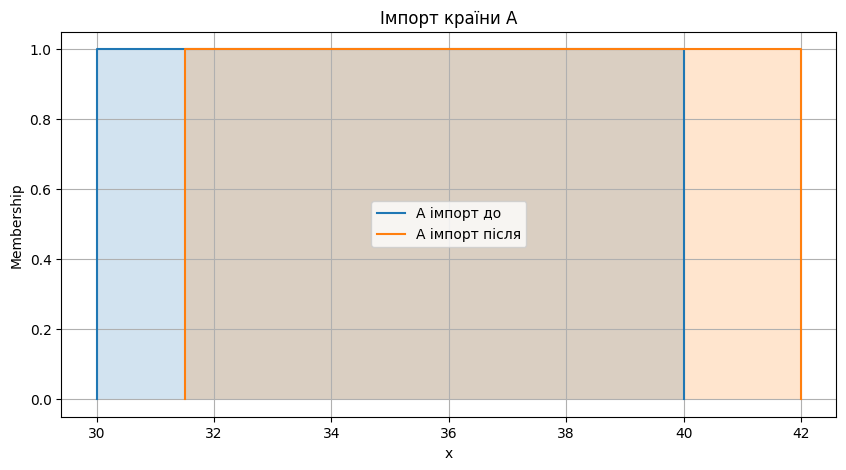

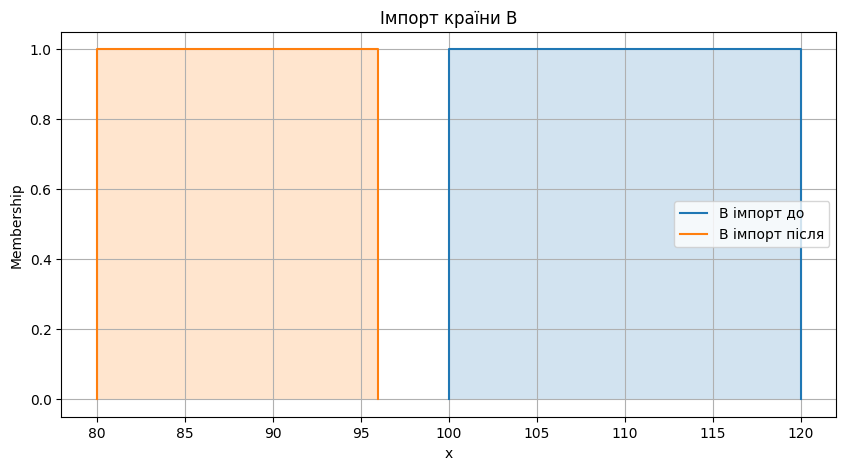

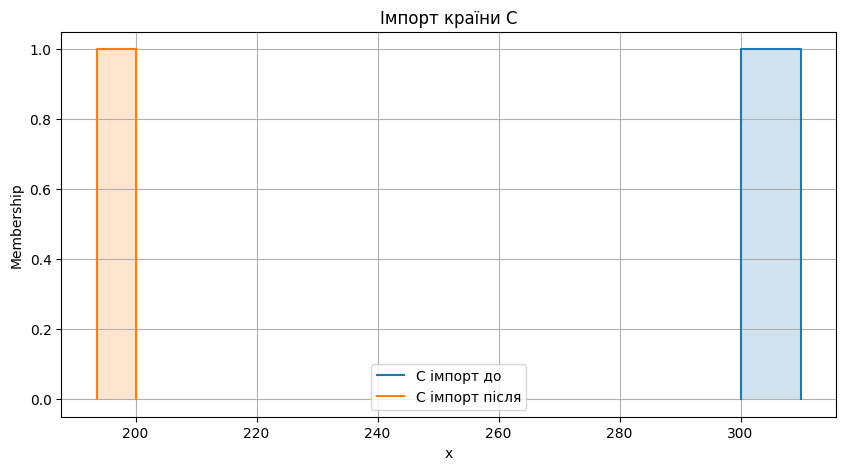

In [19]:
plot_lr_intervals(A_i1, A_e1, labels=["A імпорт до", "A імпорт після"], title="Імпорт країни A")
plot_lr_intervals(B_i1, B_e1, labels=["B імпорт до", "B імпорт після"], title="Імпорт країни B")
plot_lr_intervals(C_i1, C_e1, labels=["C імпорт до", "C імпорт після"], title="Імпорт країни C")

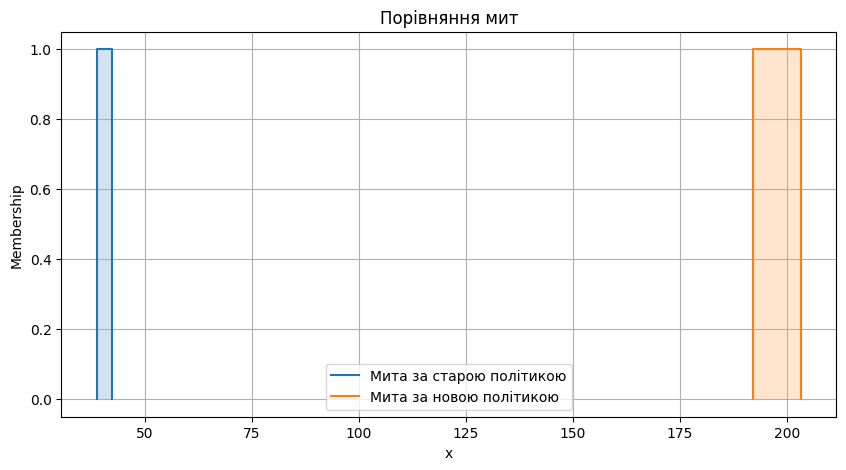

In [20]:
plot_lr_intervals(T1, T2, labels=["Мита за старою політикою", "Мита за новою політикою"], title="Порівняння мит")

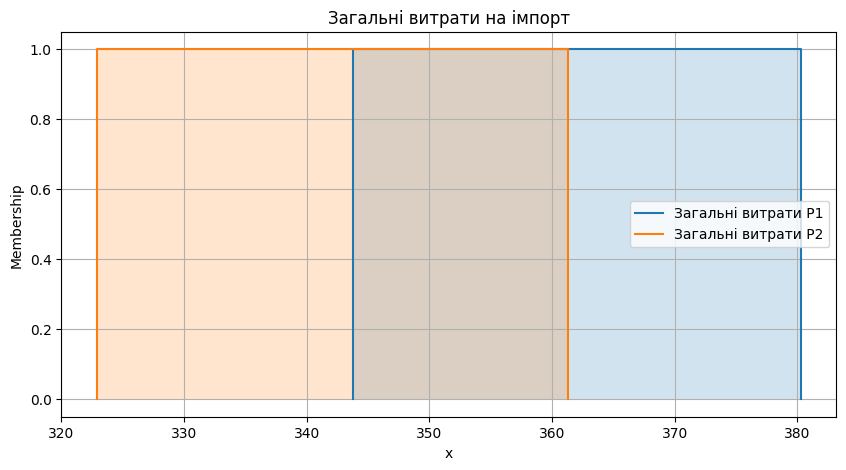

In [21]:
plot_lr_intervals(P1, P2, labels=["Загальні витрати P1", "Загальні витрати P2"], title="Загальні витрати на імпорт")

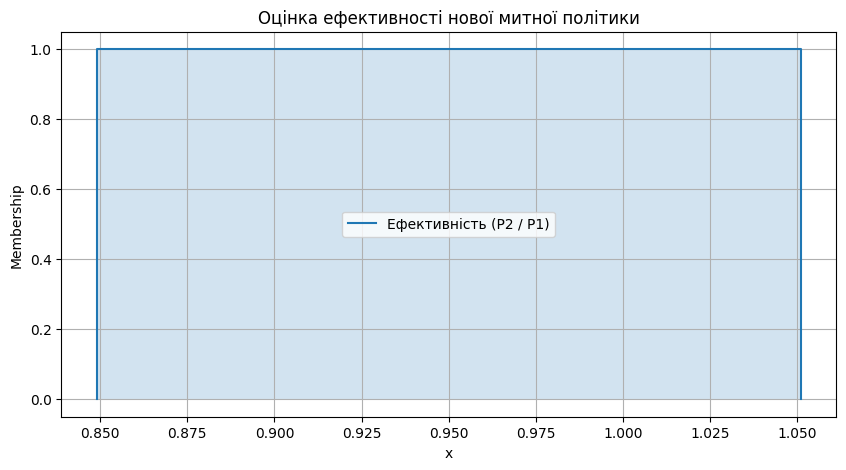

In [22]:
plot_lr_intervals(Eff, labels=["Ефективність (P2 / P1)"], title="Оцінка ефективності нової митної політики")

### Власний приклад 2

Видавець ігор вирішив змінити стратегію залучення нових гравців шляхом введення механізму підписок:
Гравець може сплачувати **20 у.о на місяць** аби отримувати доступ до бібліотеки ігор, а не **платити по 60 у.о. за кожну**
Ця ініціатива залучила **200 тисяч підписників**

Наступного місяця відбудеться реліз нової гри.
Маркетологи прогнозують проєкту **від 500 тис. до 1 мільйона** проданих копій протягом півроку **з найбільш вірогідним інтервалом у 600 - 700 тисяч**

Альтернативно гру можна додати до бібліотеки, що **додасть ще 100 тисяч підписників**, але продажів буде лише **від 100 до 200 тисяч, а ймовірніше від 120 до 150** 

Допоможіть менеджеру Філу зробити правильний вибір!

In [24]:
q_sub = const(20 * 6)
q_buy = const(60)

c1 = const(200)
c2 = const(300)

s1 = trapmf(600, 700, 500, 1000)
s2 = trapmf(120, 150, 100, 200)

P1 = (q_sub * c2 + s2 * q_buy)
P2 = (q_sub * c1 + s1 * q_buy)
E = P1 / P2

print(P1, P2)
print(E)

LRInterval(a=43200, b=45000, alpha=1200, beta=3000) LRInterval(a=60000, b=66000, alpha=6000, beta=18000)
LRInterval(a=0.6545454545454545, b=0.75, alpha=0.19669421487603306, beta=0.125)


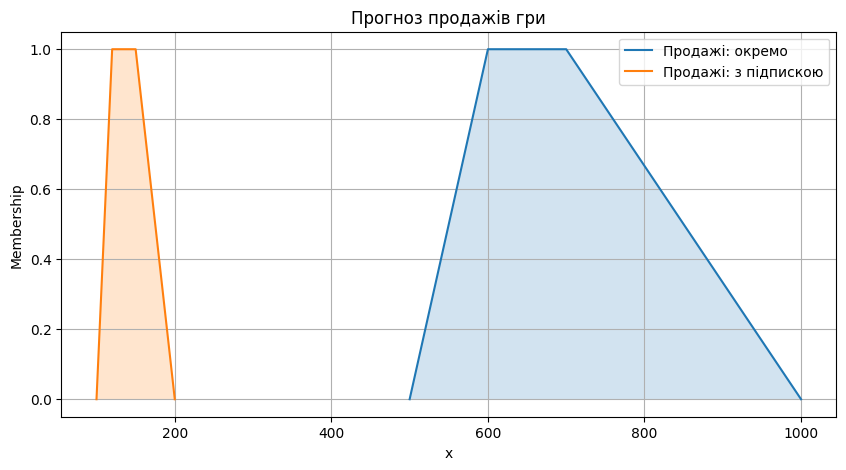

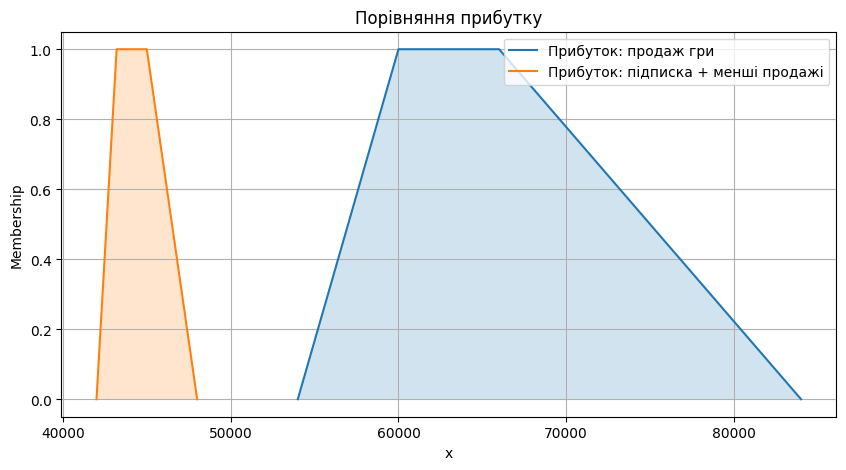

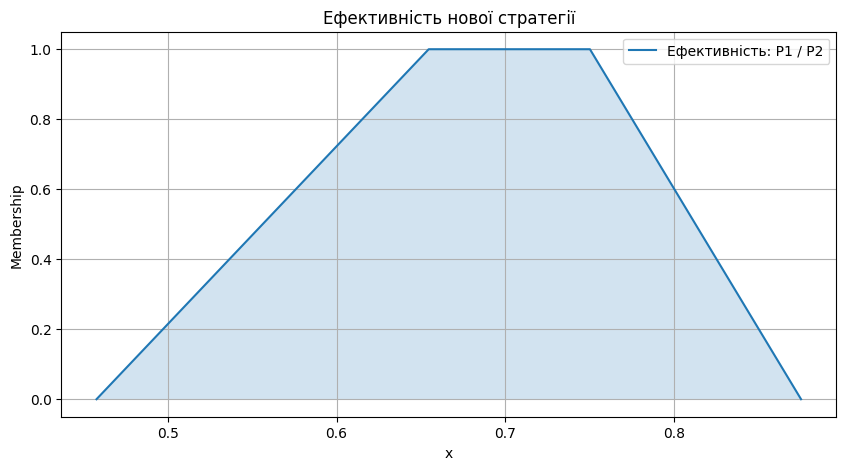

In [25]:
plot_lr_intervals(s1, s2, labels=["Продажі: окремо", "Продажі: з підпискою"], title="Прогноз продажів гри")

plot_lr_intervals(P2, P1, labels=["Прибуток: продаж гри", "Прибуток: підписка + менші продажі"], title="Порівняння прибутку")

plot_lr_intervals(E, labels=["Ефективність: P1 / P2"], title="Ефективність нової стратегії")

Отже, стратегія продажу гри окремо має значно більший потенційний прибуток,
Хоча діапазон можливих значень ширший, його крайнє ліве значення розташовання поза стратегією із підпискою праворуч, тобто є апріорі кращим.